In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import time

from my_lib.utility import *

# Actividad 2: Encontrar solución de un problema mediante el uso de algoritmos géneticos

Encontrar la función objetivo que englobe un valor óptimo

- Encontrar valores máximo para la función $x^2$

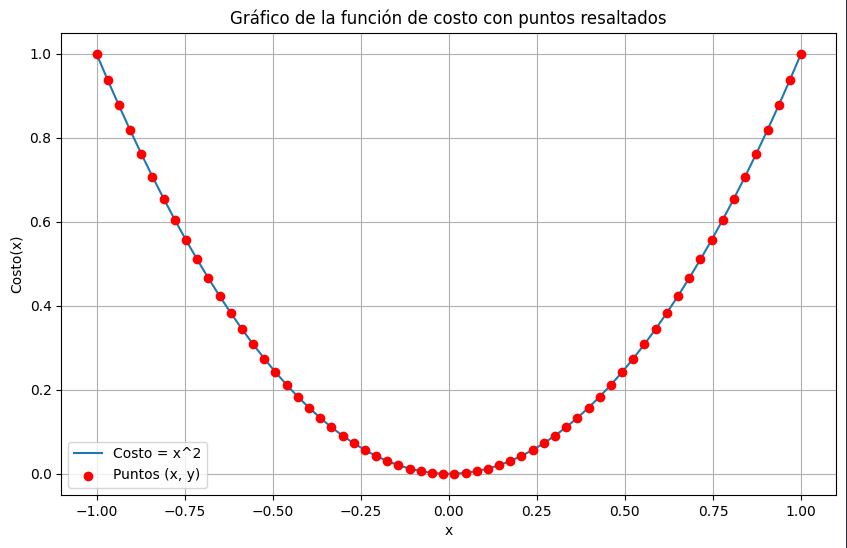

- El rango de valores para evaluar la función aptitud son: $[0-1]$
- Trabajar con cromosomas binarios con 6 posiciones $|1|1|1|0|0|0|$
- Por lo anterior se debe trabajar con alelos dicotomicos ${0,1}$
- Los valores del espacio de búsqueda estan comprendidos en ${-1,1}$

## Diagrama de flujo para encontrar soluciones usando algoritmos geneticos
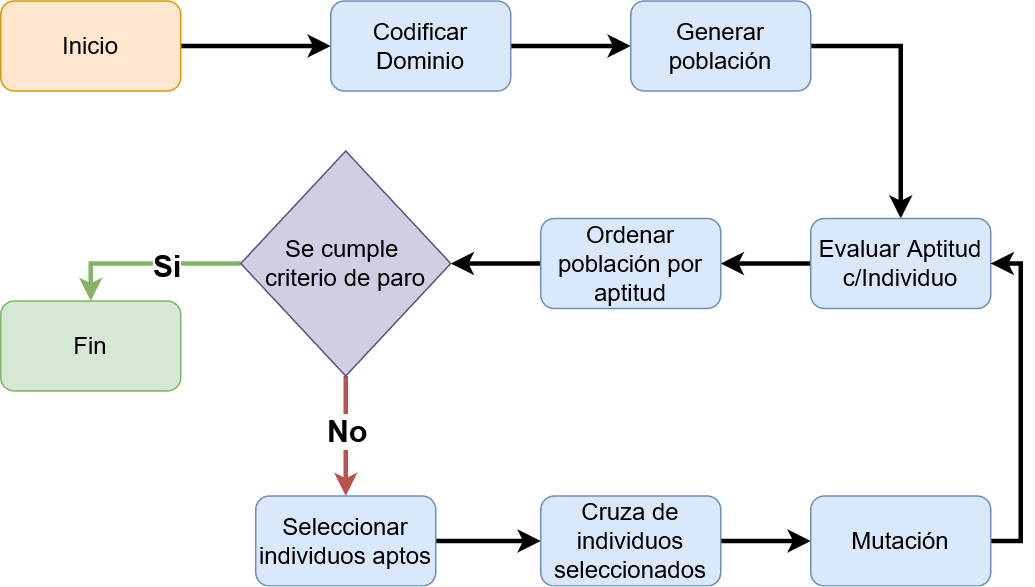

Para encontrar la solución al problmea planteado se debe tomar en consideración lo siguiente:
- Se trabaja con una representación binaria con 6 posciciones
- El tamaño de la polbación es de 10
- Para determinar que individuos pasan a la siguiente generación se utilizara comptencia genetica
- Para seleccionar los individuos que tendran descendencia se implementaran 2 métodos:
    - Ruleta
    - Aleatorio Monogamico
- Como operador de cruce se utilizara el método de un corte
- Como creterio de para se emplera un método mixto, usando tanto un número determinado de generaciones y el termino de epsilon

## 1era solución con metodo de selección de Ruleta

### Codificar dominio y evaluar la aptitud de los individuos

In [2]:
#Generar espacio de soluciones
espacio_busqueda_src = np.linspace(-1,1,64)

#Definir la función de aptitud/costo
def costo(x):
    return x**2

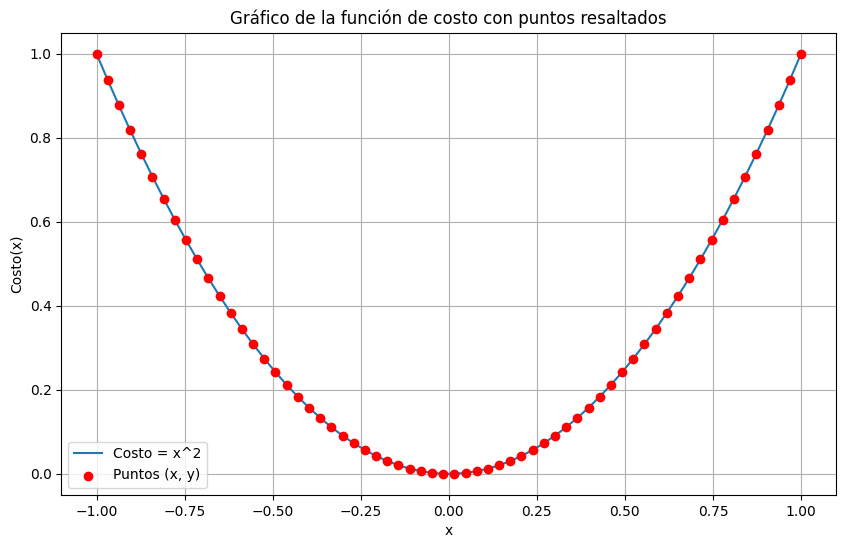

In [3]:
# Evaluar la función de costo para cada valor en conjunto_solucion
valores_costo = costo(espacio_busqueda_src)

# Establecer el tamaño de la gráfica
plt.figure(figsize=(10, 6))  # 10 pulgadas de ancho, 6 pulgadas de alto

# Graficar la función de costo
plt.plot(espacio_busqueda_src, valores_costo, label='Costo = x^2')

# Resaltar los puntos x,y en la gráfica con scatter
plt.scatter(espacio_busqueda_src, valores_costo, color='red', label='Puntos (x, y)', zorder=5)

# Añadir etiquetas y leyendas
plt.xlabel('x')
plt.ylabel('Costo(x)')
plt.title('Gráfico de la función de costo con puntos resaltados')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [4]:
#Normalizar espacio de busqueda valores [0-63]
espacio_busqueda_norm = normalizar(espacio_busqueda_src,0,63)

#Codificar a binario las soluciones del espacio de busqueda
espacio_busqueda_bin = binarizar(nbites=6,datos=espacio_busqueda_norm)

Además de generar el espacio de busqueda real, noramlizado y su codificación en número binario también se agregara su aptitud, todo esto se almacena en una matriz de tamaño $63 \times 4$
$$
espacio\_busqueda = 
\begin{bmatrix}
   r_{00} & n_{01} & b_{02} & a_{03} \\
   r_{90} & n_{091} & b_{92} & a_{93}
\end{bmatrix}
$$

In [5]:
#Definir matriz con 4 columnas
espacio_busqueda = np.zeros((espacio_busqueda_src.shape[0],4), dtype=object)

#Pirmer columna para el valor real
espacio_busqueda[:,0] = espacio_busqueda_src

#Segunda columna para el valor normalizado
espacio_busqueda[:,1] = np.round(espacio_busqueda_norm, decimals=0)

#Tercer columna para el valor en binario
espacio_busqueda [:,2] = espacio_busqueda_bin

#Cuarta columna para la aptitud de cada inidividuo
espacio_busqueda [:,3] = [costo(x) for x in espacio_busqueda_src]

print(espacio_busqueda)

[[-1.0 0.0 '000000' 1.0]
 [-0.9682539682539683 1.0 '000001' 0.9375157470395565]
 [-0.9365079365079365 2.0 '000010' 0.8770471151423532]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [-0.873015873015873 4.0 '000100' 0.762156714537667]
 [-0.8412698412698413 5.0 '000101' 0.7077349458301839]
 [-0.8095238095238095 6.0 '000110' 0.655328798185941]
 [-0.7777777777777778 7.0 '000111' 0.6049382716049383]
 [-0.746031746031746 8.0 '001000' 0.5565633660871756]
 [-0.7142857142857143 9.0 '001001' 0.5102040816326531]
 [-0.6825396825396826 10.0 '001010' 0.46586041824137064]
 [-0.6507936507936508 11.0 '001011' 0.4235323759133283]
 [-0.6190476190476191 12.0 '001100' 0.3832199546485261]
 [-0.5873015873015873 13.0 '001101' 0.344923154446964]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.5238095238095238 15.0 '001111' 0.2743764172335601]
 [-0.4920634920634921 16.0 '010000' 0.24212648022171834]
 [-0.46031746031746035 17.0 '010001' 0.2118921642731167]
 [-0.4285714285714286 18.0 '010010'

### Generar la población

En este caso se genera de manera aleatoria, se seleccionan 10 individuos al azar del espacio de busqueda

In [6]:
#Generar una población inicial con 10 inidividuos de manera aleatoria
poblacion = generar_poblacion(espacio_busqueda,10)
print("Población inicial")
print(poblacion)

Población inicial
[[-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]
 [0.8412698412698412 58.0 '111010' 0.7077349458301837]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [-1.0 0.0 '000000' 1.0]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [0.9365079365079363 61.0 '111101' 0.8770471151423528]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]]


### Ordenar la población por aptitud, de mayor a menor

In [7]:
#Ordenar de mayor a menor
pob_ord = ordenar_poblacion(poblacion)
print("Población ordenada")
print(pob_ord)

Población ordenada
[[-1.0 0.0 '000000' 1.0]
 [0.9365079365079363 61.0 '111101' 0.8770471151423528]
 [-0.9047619047619048 3.0 '000011' 0.8185941043083901]
 [0.8412698412698412 58.0 '111010' 0.7077349458301837]
 [0.6507936507936507 52.0 '110100' 0.42353237591332815]
 [-0.5555555555555556 14.0 '001110' 0.308641975308642]
 [-0.3650793650793651 20.0 '010100' 0.13328294280675235]
 [-0.2698412698412699 23.0 '010111' 0.07281431090954903]
 [-0.1428571428571429 27.0 '011011' 0.020408163265306135]
 [-0.015873015873015928 31.0 '011111' 0.0002519526329050156]]


### Iteración

### Selección de individuos por aptitud (Ruleta)

In [8]:

hist_file = "../files/ac1_hist_ruleta.xlsx"
cols = ['valor_real','valor_normal','valor_binario','aptitud']


#Establecer criterios de paro
max_gen = 10
gen = 0

GENERACIONES = []
HISTDF = []

GENERACIONES.append(pob_ord)


start_time = time.time()
while True:
    #Poblacion actual
    if gen >= max_gen or paro_epsilon(pob_ord, umb=0.94,prctg=0.9):
        print("Se termino")
        break
    else:
        #Guardar historial
        pobdf = pd.DataFrame(pob_ord,columns=cols)
        
        
        #Obtener siguiente generacion
        #op_seleccion=0 -> Selección por ruleta
        #op_cruza=0 -> cruza 1 corte
        hijos = get_next_gen(pob_ord,op_seleccion=0,op_cruza=0)
        #Codificar hijos
        desc = buscar_hijos(hijos,espacio_busqueda)
        #Agregar hijos a la poblacion existente
        new_age = pob_ord.copy()
        for hijo in desc:
            new_age = np.vstack([new_age,hijo])
        
        hdf = pd.DataFrame(hijos,columns=['hijo','padres'])
        descdf = pd.DataFrame(desc,columns=cols)
        
        #Ordenar poblacion total
        new_age = ordenar_poblacion(new_age)
        
        HISTDF.append([pobdf,hdf,descdf])
        
        #Aplicar competencia genetica y elegir mejores 10
        pob_ord = new_age[:10,:]
        GENERACIONES.append(pob_ord)#Agregar la siguiente generacion
        
        
        print(f"Gneración: {gen}")
        gen += 1
        
end_time = time.time()
elapsed_time =  end_time - start_time
print(f'Tiempo de ejecucion (segundos): {elapsed_time}')

Gneración: 0
Gneración: 1
Gneración: 2
Gneración: 3
Gneración: 4
Gneración: 5
Se termino
Tiempo de ejecucion (segundos): 0.013020038604736328


Guardar generaciones e hijos en un archivo excel, cada hoja corresponde a una nueva generación

In [9]:
print(len(HISTDF))
with pd.ExcelWriter(hist_file) as writer:
    for gen,h in enumerate(HISTDF):
        pobdf = h[0]
        hdf = h[1]
        descdf = h[2]
        
        pobdf.to_excel(writer,
                           sheet_name=f'gen_{gen}',
                           index=False,
                           startrow=0, startcol=0)
        hdf.to_excel(writer,
                     sheet_name=f'gen_{gen}',
                     index=False,
                     startrow=0, startcol=5)
        descdf.to_excel(writer,
                        sheet_name=f'gen_{gen}',
                        index=False,
                        startrow=0, startcol=8)
    
    generacion_res = GENERACIONES[-1]
    generacion_rdf = pd.DataFrame(generacion_res,columns=cols)
    generacion_rdf.to_excel(writer,
                            sheet_name='Función objetivo',
                            index=False)

6


In [10]:
print(f'Población respuesta generaciones: {len(GENERACIONES)}, Función objetivo')
display(pd.DataFrame(GENERACIONES[-1],columns=cols).head(10))

Población respuesta generaciones: 7, Función objetivo


,valor_real,valor_normal,valor_binario,aptitud
0,-1.0,0.0,000000,1.0
1,-1.0,0.0,000000,1.0
2,-1.0,0.0,000000,1.0
3,-1.0,0.0,000000,1.0
4,-1.0,0.0,000000,1.0
5,-1.0,0.0,000000,1.0
6,-1.0,0.0,000000,1.0
7,-1.0,0.0,000000,1.0
8,-1.0,0.0,000000,1.0
9,-1.0,0.0,000000,1.0


### Resultados

In [11]:
apt_media = []
apt_std = []
apt_varianza = []
apt_best = []
apt_worst = []
for generacion in GENERACIONES:
    gnr_apt = generacion[:,-1] 
    apt_media.append(np.mean(gnr_apt))
    apt_std.append(np.std(gnr_apt))
    apt_varianza.append(np.var(gnr_apt))
    apt_best.append(np.max(gnr_apt))
    apt_worst.append(np.min(gnr_apt))
    

In [12]:
#Graficar resultados

# Crea el gráfico

fig = go.Figure(data=[

    go.Scatter(x=list(range(len(GENERACIONES))), y=apt_media, name='Media Aptitud'),

    go.Scatter(x=list(range(len(GENERACIONES))), y=apt_std, name='Desviación Estándar Aptitud'),
    
    go.Scatter(x=list(range(len(GENERACIONES))), y=apt_varianza, name='Varianza Aptitud')

])


# Personaliza el gráfico

fig.update_layout(

    title='Evolución de la Aptitud en cada Generación',

    xaxis_title='Generación',

    yaxis_title='Aptitud'

)


# Muestra el gráfico

fig.show()

In [13]:
# Crea la gráfica para la mejor y peor aptitud

fig2 = go.Figure(data=[

    go.Scatter(x=list(range(len(GENERACIONES))), y=apt_best, name='Mejor Aptitud'),

    go.Scatter(x=list(range(len(GENERACIONES))), y=apt_worst, name='Peor Aptitud')

])


# Personaliza la gráfica

fig2.update_layout(

    title='Mejor y Peor Aptitud en cada Generación',

    xaxis_title='Generación',

    yaxis_title='Aptitud'

)


# Muestra la gráfica

fig2.show()

In [ ]:
print("Fin todo tiene u n fin")

### Obtener nueva poblacion

Se juntan los padres y los hijos y por medio de competencia genetica o elitismo se obtiene la nueva generación


In [ ]:
hijos = seleccion_ruleta(5,pob_ord)
for h in hijos:
    print(h)

In [ ]:
desc = buscar_hijos(hijos,espacio_busqueda)
print(pob_ord)

In [ ]:
print(ordenar_poblacion(desc))

In [ ]:
new_age = pob_ord.copy()
for hijo in desc:
    new_age = np.vstack([new_age,hijo])
new_age = ordenar_poblacion(new_age)
print(new_age)

In [ ]:
GENS = []
GENS.append(pob_ord)

In [ ]:
print(f'Nueva generacion: \n {new_age[:10,:]}')
pob_ord = new_age[:10,:]
GENS.append(pob_ord)

In [ ]:
print(GENS)

In [ ]:
pob_ord

In [ ]:
def torneo_a(T):
    k = len(T)
    ganador = T[0]
    ganador_idx = idx[0]
    
    for i in range(1, k):
        retador = T[i]
        
        if ganador[-1] < retador[-1]:
            ganador = retador
            ganador_idx = idx[i]
    
    return ganador

def torneo_b (T):
    ganador = seleccion_ruleta(T,1)[0]
    return ganador

def torneo_r (T):
    if not len(T)%2 == 0:
        aux = np.zeros((1,T.shape[1]),dtype=object)
        T = np.vstack([T,aux])
    
    n = int(len(T)/2)
    l = len(T) - 1
   
    print(T)
    print("--------------------------------------------------------------------------")
    ganadores = np.zeros((n,T.shape[1]),dtype=object)
    for i in range(n):
        aux_T = np.array([T[i],
                          T[l-i]])
        print (f"{aux_T[0]} vs {aux_T[1]}")
        ganador = torneo_b(aux_T)
        print(f"ganador: {ganador}")
        ganadores[i] = ganador
    
    return ganadores    

def seleccion_torneo(pob, k=5, n=10):
    pob_t = pob.copy()
    tam = pob_t.shape[0]
    indx = np.random.choice(range(tam),k,replace=False)
    T = pob_t[indx]
    ganadores = np.zeros((n,pob.shape[1]),dtype = object)
    
    aux_g = torneo_r(T)
    print(aux_g)
    #for i in range (n):
        #indx = np.random.choice(range(tam),k,replace=False)
        #T = pob_t[indx]
        
        #ganador = torneo_b(T)    
        #ganadores[i] = ganador
        
        
    
    return ganadores

In [ ]:
#torneo_a(pob_ord)
seleccion_torneo(pob_ord)